# Loomia sensor evaluation - Round 2

Evaluation of Loomia sensors from prototype round 2. Round 1 sensor shad very low sensitivity. Round 2 seem way more sensitive, this is an attempt to quantify their performance.

In [182]:
# Library imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load data from .xls file
DATA_FOLDER = 'data'
DATA_SAMPLE = '/sens_eval_2A.xlsx'
sample_name = DATA_SAMPLE.lstrip('/').replace(r'.xlsx','')

sample = pd.read_excel(DATA_FOLDER+DATA_SAMPLE, sheet_name='4-press worn robot')
df = sample[['A1','A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']].drop(sample.index[999:])
df = df.apply(pd.to_numeric)

In [183]:
# Load data from .csv file
DATA_FOLDER = 'data'
DATA_SAMPLE = '/2B_points.csv'
sample_name = DATA_SAMPLE.lstrip('/').replace(r'.csv','')

sample = pd.read_csv(DATA_FOLDER+DATA_SAMPLE)
df = sample[['A1','A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']]

In [ ]:
# Get stats from data sample
print(df.describe())

## Plotting functions

In [217]:
def time_plot(df, sample_name):
    
    # Initialise figure
    fig, ax = plt.subplots(figsize=(16,4))
    ax.plot(df)
    
    # Define colour space for lines
    colourmap = plt.cm.gist_ncar
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 0.9, 9))))
    
    # Set up layout
    ax.set(xlabel='time steps',
           ylabel='signal (analog counts)',
           title='data sample: '+sample_name)
    labels = ['A1','A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']
    ax.legend(labels)
    ax.grid()

#     fig.savefig("data/plots/"+sample_name+"_timeplot.png")
    plt.show()    
    
    return

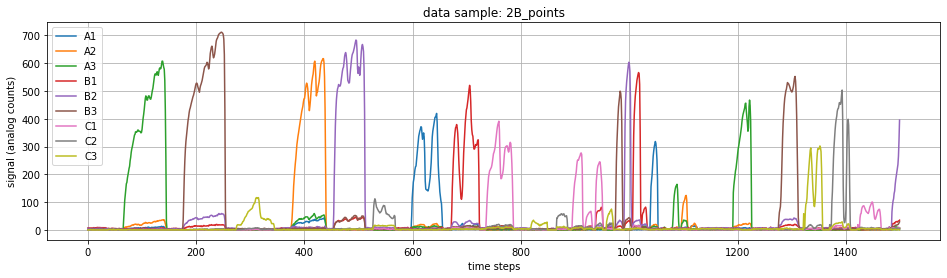

In [186]:
# Example of time plot
time_plot(df, sample_name)

In [185]:
def max_plot(data, sample_name):

    fig, ax = plt.subplots(figsize=(16,4))
    labels = ['A1','A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']
    data = data[:].max()

    plot = ax.bar(labels, data)
    
    # Set up layout
    ax.set(xlabel='sensor cell',
           ylabel='signal range (analog counts)',
           title='data sample: '+sample_name)
    ax.grid()

    plt.show()
    return

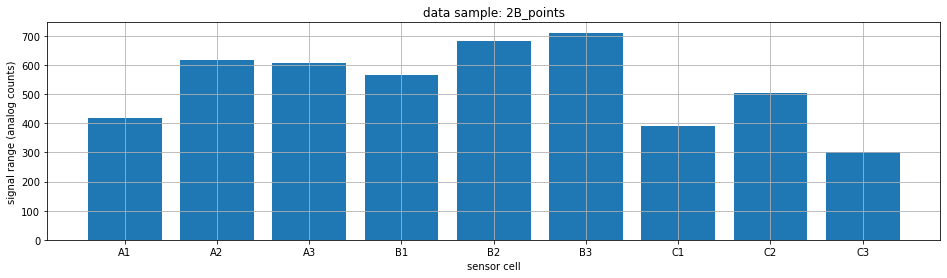

In [187]:
# Example of max plot
max_plot(df, sample_name)

In [188]:
def box_plot(data, sample_name, uplim=None):

    fig, ax = plt.subplots(figsize=(8,4))
    labels = ['A1','A2','A3','B1','B2','B3','C1','C2','C3']

    plot = ax.boxplot(data.T)

    # Set up layout
    ax.set(xlabel='sensor cell',
           ylabel='signal range (analog counts)',
           title='data sample: '+sample_name,
           xticklabels=labels)
    ax.set_ybound(lower=0, upper=uplim)
    ax.grid()

    plt.show()
    return

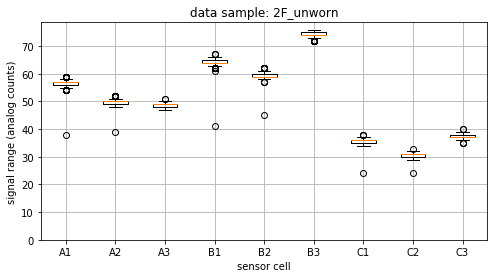

In [206]:
# Example of box plot
box_plot(df, sample_name)

In [190]:
def max_map(data, sample_name):

    rows = ['A','B','C']
    columns = ['1','2','3']

    max_data = data[:].max().to_numpy().reshape((3,3))

    # Plot the heatmap
    fig, ax = plt.subplots()
    im = ax.imshow(max_data, cmap="YlOrRd", vmin=0, vmax=1000) # cmap="Wistia"

    # Create colorbar
    cbar_kw={}
    cbarlabel="Sensor max values (analog counts)"
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(columns)))
    ax.set_yticks(np.arange(len(rows)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(columns)
    ax.set_yticklabels(rows)

    # Loop over data dimensions and create text annotations.
    for i in range(len(rows)):
        for j in range(len(columns)):
            text = ax.text(j, i, max_data[i, j],
                           ha="center", va="center", color="black")

    ax.set_title('data sample: '+sample_name)
    fig.tight_layout()
    plt.show()
    
    return

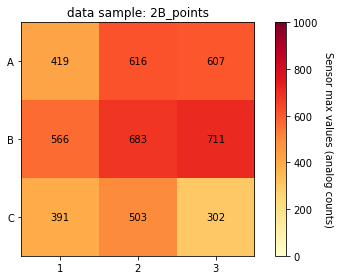

In [191]:
# max map example
max_map(df, sample_name)

In [192]:
def avg_map(data, sample_name):

    rows = ['A','B','C']
    columns = ['1','2','3']

    max_data = data[:].mean(axis=0).astype(int).to_numpy().reshape((3,3))

    # Plot the heatmap
    fig, ax = plt.subplots()
    im = ax.imshow(max_data, cmap="YlOrRd", vmin=0, vmax=1000) # cmap="Wistia"

    # Create colorbar
    cbar_kw={}
    cbarlabel="Sensor max values (analog counts)"
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(columns)))
    ax.set_yticks(np.arange(len(rows)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(columns)
    ax.set_yticklabels(rows)

    # Loop over data dimensions and create text annotations.
    for i in range(len(rows)):
        for j in range(len(columns)):
            text = ax.text(j, i, max_data[i, j],
                           ha="center", va="center", color="black")

    ax.set_title('data sample: '+sample_name)
    fig.tight_layout()
    plt.show()
    
    return

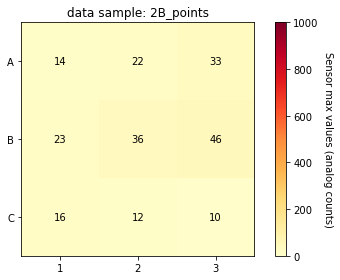

In [193]:
# avg map example
avg_map(df, sample_name)

## Loop plotting functions

In [222]:
def box_plot2(fig, axs, data, sample_name, n, uplim=None):

    labels = ['A1','A2','A3','B1','B2','B3','C1','C2','C3']
    x=int(n/2)
    y=n%2

    plot = axs[x,y].boxplot(data.T)
#     plot = axs[x,y].boxplot(data.T, 0, '')     # don't show outliers

    # Set up layout
    axs[x,y].set(xlabel='sensor cell',
           ylabel='signal range (analog counts)',
           title='data sample: '+sample_name,
           xticklabels=labels)
    axs[x,y].set_ybound(lower=0, upper=uplim)
    axs[x,y].grid()
    
    fig.tight_layout()
    fig.set_figheight(12)
    fig.set_figwidth(16)

    return

In [ ]:
# Example of boxplot subplots
fig, axs = plt.subplots(3, 2)
box_plot2(fig, axs, df, sample_name, n=3)

In [211]:
def avg_map2(fig, axs, data, sample_name, n, uplim=1000):

    rows = ['A','B','C']
    columns = ['1','2','3']
    
    x=int(n/3)
    y=n%3

    avg_data = data[:].mean(axis=0).astype(int).to_numpy().reshape((3,3))

    # Plot the heatmap
    im = axs[x,y].imshow(avg_data, cmap="YlOrRd", vmin=0, vmax=uplim) # cmap="Wistia"

    # We want to show all ticks...
    axs[x,y].set_xticks(np.arange(len(columns)))
    axs[x,y].set_yticks(np.arange(len(rows)))
    # ... and label them with the respective list entries
    axs[x,y].set_xticklabels(columns)
    axs[x,y].set_yticklabels(rows)

    # Loop over data dimensions and create text annotations.
    for i in range(len(rows)):
        for j in range(len(columns)):
            text = axs[x,y].text(j, i, avg_data[i, j],
                           ha="center", va="center", color="black")

    axs[x,y].set_title('data sample: '+sample_name)
    fig.tight_layout()
    fig.set_figheight(10)
    fig.set_figwidth(10)
    
    return fig, axs

In [ ]:
# Example of avg map subplots
fig, axs = plt.subplots(2, 3,figsize=(16,4))
avg_map2(fig, axs, df, sample_name, 3)

In [204]:
def max_map2(fig, axs, data, sample_name, n):

    rows = ['A','B','C']
    columns = ['1','2','3']
    
    x=int(n/3)
    y=n%3

    avg_data = data[:].max().to_numpy().reshape((3,3))

    # Plot the heatmap
    im = axs[x,y].imshow(avg_data, cmap="YlOrRd", vmin=0, vmax=1000) # cmap="Wistia"

    # We want to show all ticks...
    axs[x,y].set_xticks(np.arange(len(columns)))
    axs[x,y].set_yticks(np.arange(len(rows)))
    # ... and label them with the respective list entries
    axs[x,y].set_xticklabels(columns)
    axs[x,y].set_yticklabels(rows)

    # Loop over data dimensions and create text annotations.
    for i in range(len(rows)):
        for j in range(len(columns)):
            text = axs[x,y].text(j, i, avg_data[i, j],
                           ha="center", va="center", color="black")

    axs[x,y].set_title('data sample: '+sample_name)
    fig.tight_layout()
    fig.set_figheight(10)
    fig.set_figwidth(10)
    
    return fig, axs

In [ ]:
# Example of avg map subplots
fig, axs = plt.subplots(2, 3,figsize=(16,4))
max_map2(fig, axs, df, sample_name, 3)

## Unworn baseline evaluation

Sensor lying on the table, matrix side up, unworn.

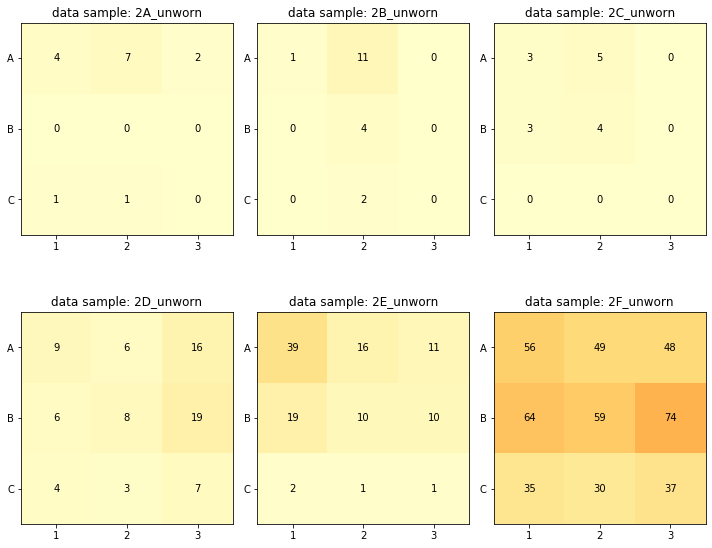

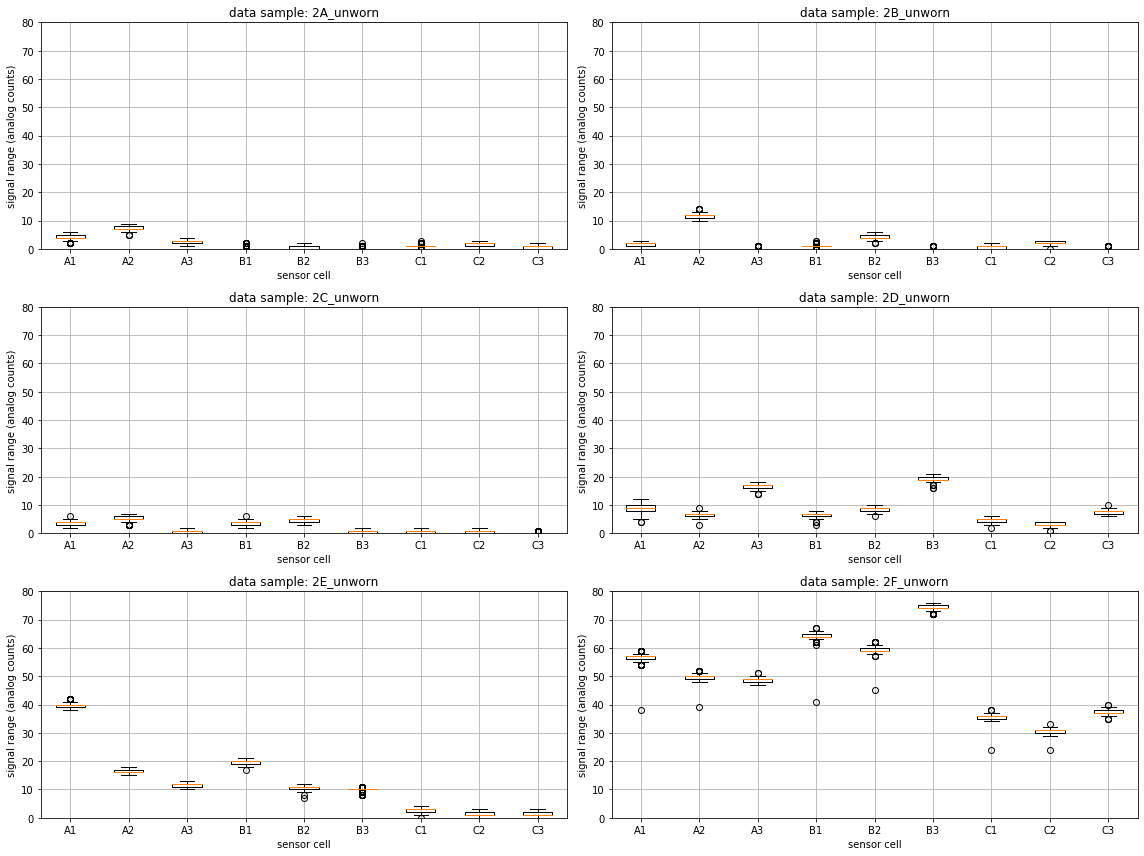

In [212]:
DATA_FOLDER = 'data'+'/unworn'
data_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith('.csv')]

# df = ['A1','A2','A3','B1','B2','B3','C1','C2','C3']

fig, axs = plt.subplots(2, 3,figsize=(16,4))
fig2, axs2 = plt.subplots(3, 2,figsize=(16,4))
n = 0

for file in sorted(data_files):
    DATA_SAMPLE = '/'+file
    sample_name = file.lstrip('/').replace(r'.csv','')
    sample = pd.read_csv(DATA_FOLDER+'/'+DATA_SAMPLE)
    df = sample[['A1','A2','A3','B1','B2','B3','C1','C2','C3']]
    
#     time_plot(df, sample_name)
    avg_map2(fig, axs, df, sample_name, n, uplim=200)
    box_plot2(fig2, axs2, df, sample_name, n, uplim=80)
    n+=1

plt.show()

## Worn baseline evaluation

Sensor lying on the table, matrix side up, with robot finger in the finger sleeve (uninflated). Results may be affected by the tightness of the finger sleeve around the sensor.

2A not very tight, finger easy to insert

2B not too tight, finger easy to insert

2C not very tight, finger easy to insert

2D a bit tight, finger easy-ish to insert

2E not too tight, finger easy to insert

2F a bit tight, finger easy-ish to insert


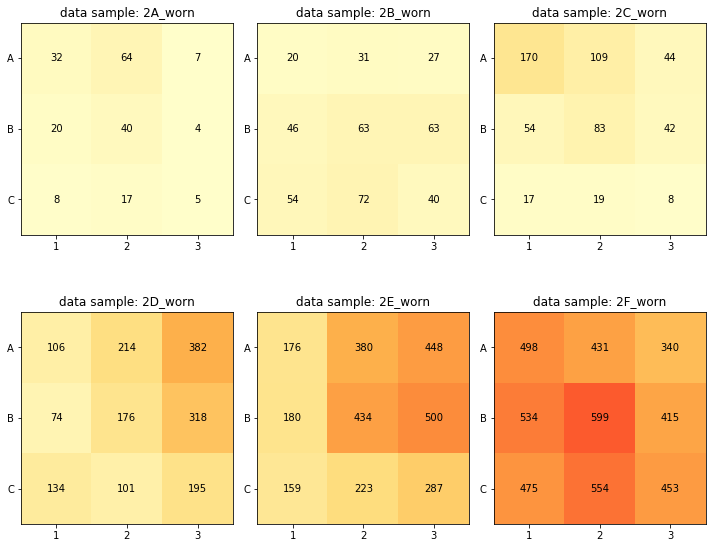

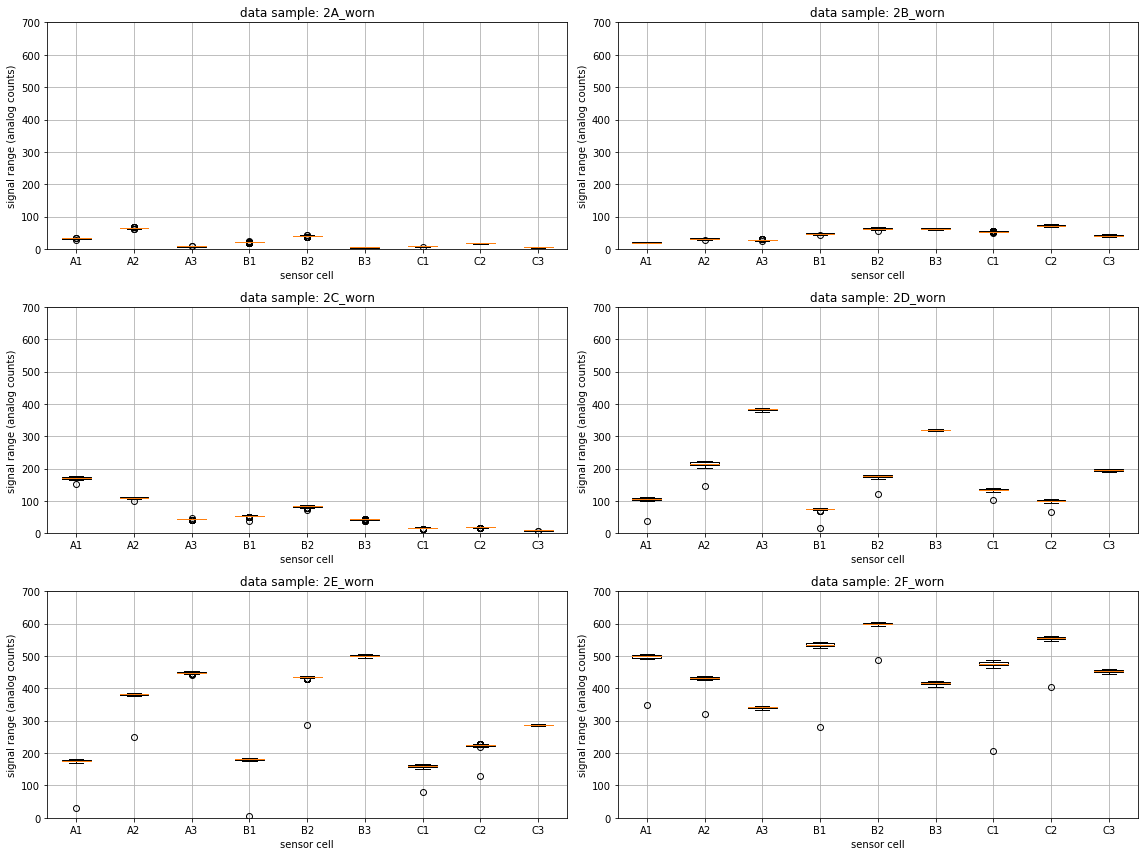

In [215]:
DATA_FOLDER = 'data'+'/worn_robot'
data_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith('.csv')]

fig, axs = plt.subplots(2, 3,figsize=(16,4))
fig2, axs2 = plt.subplots(3, 2,figsize=(16,4))
n = 0

for file in sorted(data_files):
    DATA_SAMPLE = '/'+file
    sample_name = file.lstrip('/').replace(r'.csv','')
    sample = pd.read_csv(DATA_FOLDER+'/'+DATA_SAMPLE)
    df = sample[['A1','A2','A3','B1','B2','B3','C1','C2','C3']]
    
    avg_map2(fig, axs, df, sample_name, n, uplim=1000)
    box_plot2(fig2, axs2, df, sample_name, n, uplim=700)
    n+=1

plt.show()


## 2kg point test evaluation

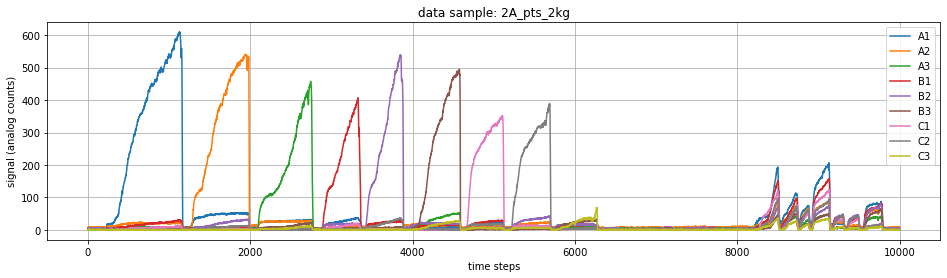

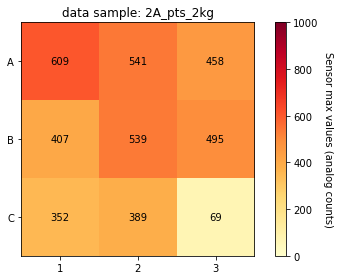

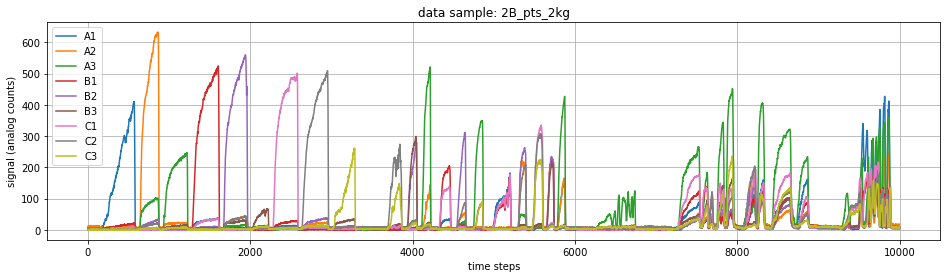

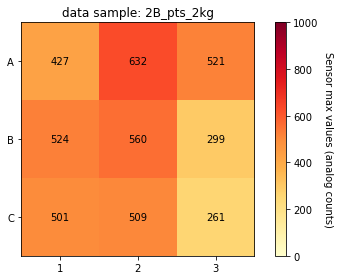

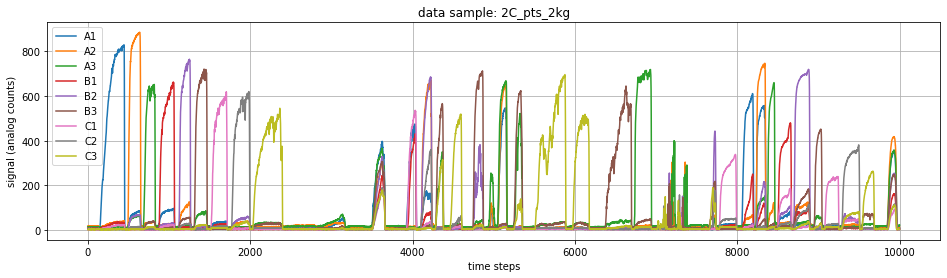

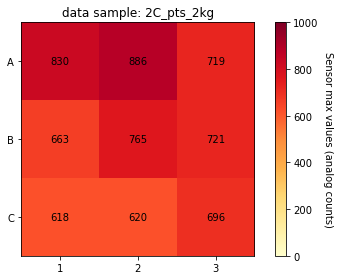

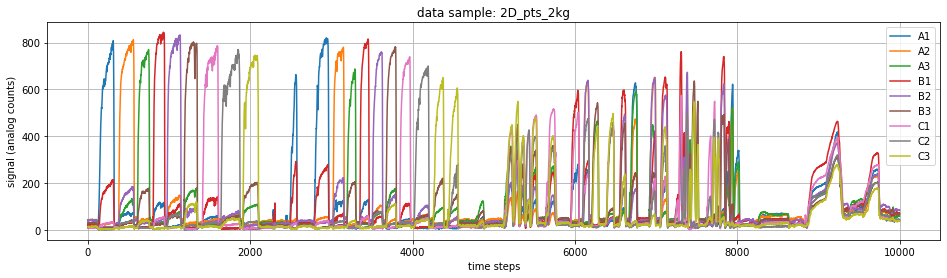

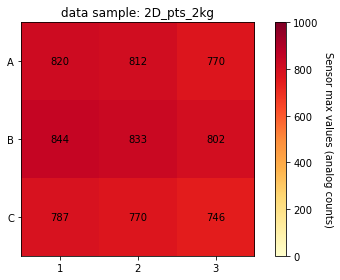

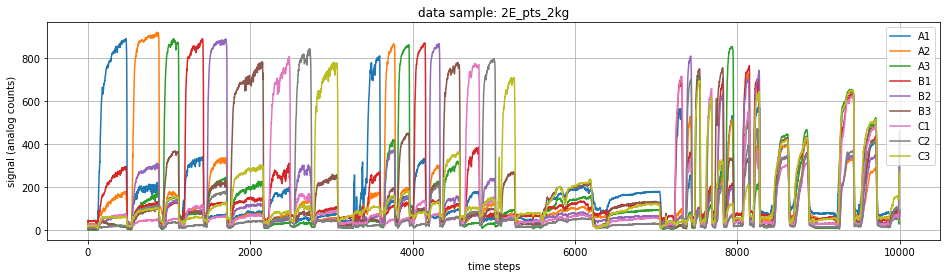

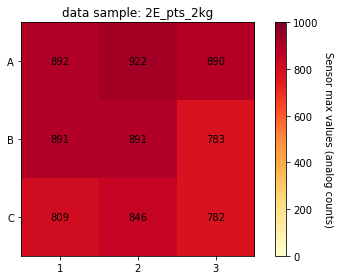

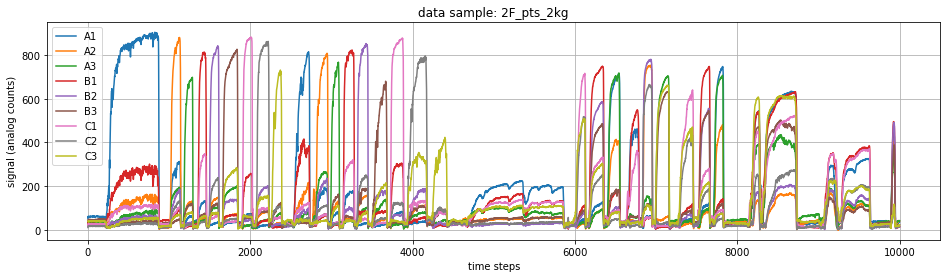

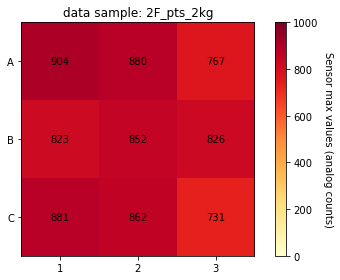

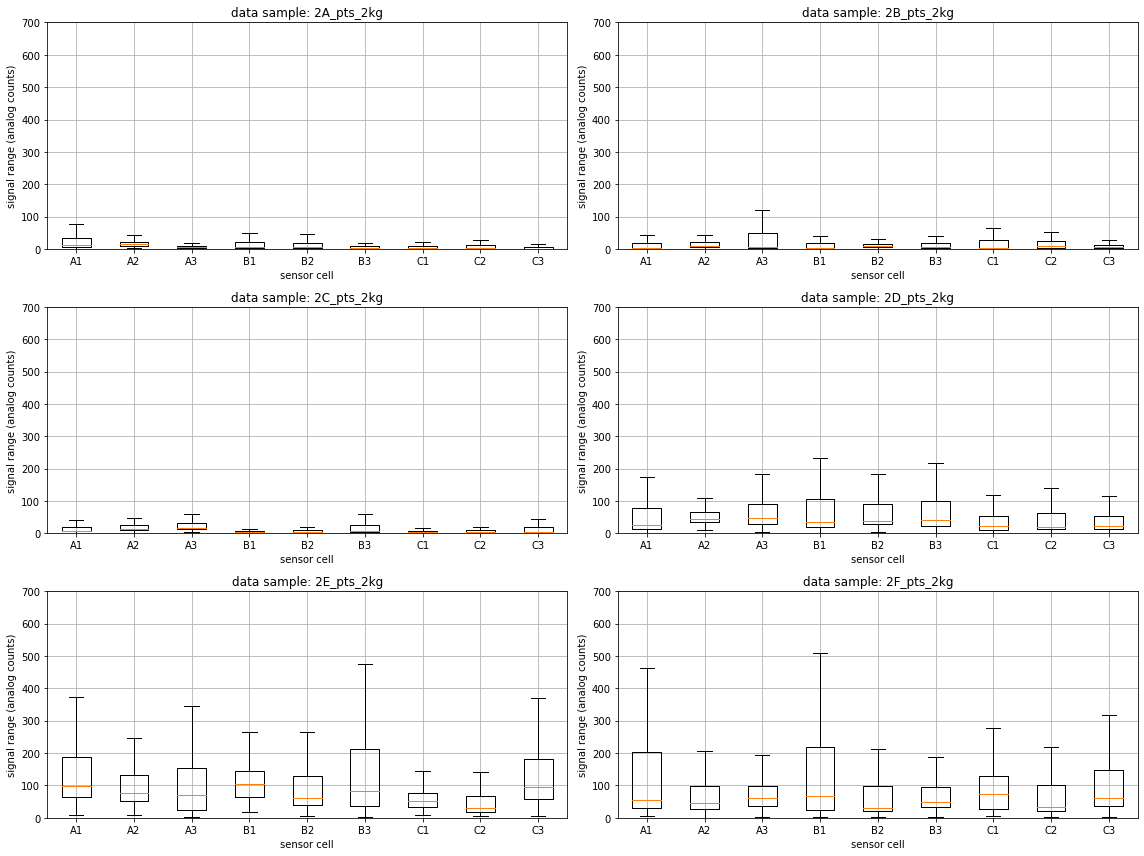

In [221]:
DATA_FOLDER = 'data'+'/pts_2kg'
data_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith('.csv')]

for file in sorted(data_files):
    DATA_SAMPLE = '/'+file
    sample_name = file.lstrip('/').replace(r'.csv','')
    sample = pd.read_csv(DATA_FOLDER+'/'+DATA_SAMPLE)
    df = sample[['A1','A2','A3','B1','B2','B3','C1','C2','C3']]
    
    time_plot(df, sample_name)
    max_map(df, sample_name)
    
    
fig2, axs2 = plt.subplots(3, 2,figsize=(16,4))
n = 0

for file in sorted(data_files):
    DATA_SAMPLE = '/'+file
    sample_name = file.lstrip('/').replace(r'.csv','')
    sample = pd.read_csv(DATA_FOLDER+'/'+DATA_SAMPLE)
    df = sample[['A1','A2','A3','B1','B2','B3','C1','C2','C3']]
    
    box_plot2(fig2, axs2, df, sample_name, n, uplim=700)
    n+=1

plt.show()